In [4]:
import os
import datetime
import warnings
import numpy as np
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")


In [5]:
%pwd

'd:\\G2M-insight-for-Cab-Investment-firm\\src\\Notebooks'

In [6]:
os.chdir("d:\\G2M-insight-for-Cab-Investment-firm")

In [7]:
Cab_Data = pd.read_csv('Data/Cab_Data.csv')
Customer_ID =  pd.read_csv("Data/Customer_ID.csv")
Transaction_ID = pd.read_csv("Data/Transaction_ID.csv")
City = pd.read_csv("Data/City.csv")

In [10]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [11]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [12]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [14]:
# Check the shape of all datasets
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City Data", City.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [15]:
#check missing values
print("Missing values in Cab_Data\n",Cab_Data.isna().sum())
print("Missing values in Customer_ID\n",Customer_ID.isna().sum())
print("Missing values in Transaction_ID\n",Transaction_ID.isna().sum())
print("Missing values in City\n",City.isna().sum())

Missing values in Cab_Data
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Missing values in Customer_ID
 Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Missing values in Transaction_ID
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
Missing values in City
 City          0
Population    0
Users         0
dtype: int64


### No missing values found in any of the datasets

In [16]:
#check for duplicate entries
print ("Duplicate entries in Cab_Data",Cab_Data.duplicated().sum())
print ("Duplicate entries in Customer_ID",Customer_ID.duplicated().sum())
print ("Duplicate entries in Transcation_ID",Transaction_ID.duplicated().sum())
print ("Duplicate entries in City",City.duplicated().sum())

Duplicate entries in Cab_Data 0
Duplicate entries in Customer_ID 0
Duplicate entries in Transcation_ID 0
Duplicate entries in City 0


### No duplicate entries in any of the datasets

In [17]:
# check the basic information 
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

In [18]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

for col in City.columns:
    if ' ' in col:
        City = City.rename(columns={col:col.replace(' ','_')})

In [19]:
# Understanding columns of datasets
print("Columns in Cab_Data\n",Cab_Data.columns)
print("Columns in Customer_ID\n",Customer_ID.columns)
print("Columns in Transaction_ID\n",Transaction_ID.columns)
print("Columns in City\n",City.columns)

Columns in Cab_Data
 Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')
Columns in Customer_ID
 Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')
Columns in Transaction_ID
 Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')
Columns in City
 Index(['City', 'Population', 'Users'], dtype='object')


In [20]:
# Summary statistics of the numerical columns in datasets
print("Summary statistics for numerical columns in Cab_Data\n",Cab_Data.describe()) 
print("Summary statistics for numerical columns in Customer_ID\n",Customer_ID.describe())
print("Summary statistics for numerical columns in Transaction_ID\n",Transaction_ID.describe())
print("Summary statistics for numerical columns in City\n",City.describe())

Summary statistics for numerical columns in Cab_Data
        Transaction_ID  Date_of_Travel   KM_Travelled  Price_Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost_of_Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
Summary statistics for numerical columns in Customer_ID
         Customer_ID           Age  Income_

In [21]:
# Fixing Date format in Cab_Data

#Cab_Data["Date_of_Travel"]=pd.to_datetime(Cab_Data["Date_of_Travel"])
#Cab_Data["Date_of_Travel"]=Cab_Data["Date_of_Travel"].dt.strftime("%d-%m-%Y")
#Cab_Data.head(2)
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [22]:
Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))
Cab_Data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [23]:
#Adding month and Year columns to cab data
Cab_Data["Date_of_Travel"]=pd.to_datetime(Cab_Data["Date_of_Travel"])

months={1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
          7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

Cab_Data['month'] = Cab_Data['Date_of_Travel'].dt.month.map(months)
Cab_Data['year'] = Cab_Data['Date_of_Travel'].dt.year

Cab_Data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,January,2016
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,January,2016


In [24]:
# We can divide Cab_Data into two categorize based on cab company

Pinkcab = Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data[Cab_Data['Company']=='Yellow Cab']

Pinkcab.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,January,2016
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,January,2016


In [25]:
YellowCab.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,year
233,10000384,2016-01-01,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,January,2016
234,10000385,2016-01-08,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,January,2016


In [26]:
MasterData = Cab_Data.merge(Transaction_ID, on ="Transaction_ID").merge(Customer_ID, on ="Customer_ID").merge(City, on ="City")

MasterData.head(2)    

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,January,2016,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,July,2018,29290,Cash,Male,28,10813,"814,885","24,701"


In [204]:
# Removing White spaces and "," from Masters data

MasterData["Population"] = MasterData["Population"].str.replace(',', '')
MasterData["Users"] = MasterData["Users"].str.replace(',', '')
MasterData["Company"] = MasterData["Company"].str.replace(' ', '')


MasterData.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,month,year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-07,PinkCab,ATLANTA GA,30.45,370.95,313.6350,January,2016,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,YellowCab,ATLANTA GA,26.19,598.70,317.4228,July,2018,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,YellowCab,ATLANTA GA,42.55,792.05,597.4020,November,2018,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,PinkCab,ATLANTA GA,28.62,358.52,334.8540,January,2016,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,YellowCab,ATLANTA GA,36.38,721.10,467.1192,April,2018,27703,Card,Male,27,9237,814885,24701


In [74]:
MasterData.shape

(359392, 16)

## Feature Engineering

In [205]:
# Calculating profit
MasterData['Profit'] = MasterData['Price_Charged'] - MasterData['Cost_of_Trip']
MasterData['Average_Profit/Ride'] = MasterData['Profit']/MasterData['KM_Travelled']

In [206]:
# Categorizing between weekdays and weekends

dayofweek = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
MasterData["weekday"] = MasterData['Date_of_Travel'].dt.dayofweek.map(dayofweek)

#assigning appropriate datatype to weekday and month columns.

MasterData['weekday'] = MasterData['weekday'].astype('category')
MasterData['month'] = MasterData['month'].astype('category')

In [219]:

MasterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Transaction_ID       359392 non-null  int64         
 1   Date_of_Travel       359392 non-null  datetime64[ns]
 2   Company              359392 non-null  object        
 3   City                 359392 non-null  object        
 4   KM_Travelled         359392 non-null  float64       
 5   Price_Charged        359392 non-null  float64       
 6   Cost_of_Trip         359392 non-null  float64       
 7   month                359392 non-null  category      
 8   year                 359392 non-null  int32         
 9   Customer_ID          359392 non-null  int64         
 10  Payment_Mode         359392 non-null  object        
 11  Gender               359392 non-null  object        
 12  Age                  359392 non-null  int64         
 13  Income_(USD/Mo

In [220]:
MasterData['Transaction_ID'] = MasterData['Transaction_ID'].astype(str)
MasterData['Customer_ID'] = MasterData['Customer_ID'].astype(str)

cols_categorical = ['Payment_Mode', 'Gender', 'City', 'Company']
MasterData[cols_categorical] = MasterData[cols_categorical].astype('category')

MasterData['Population'] = pd.to_numeric(MasterData['Population'])
MasterData['Users'] = pd.to_numeric(MasterData['Users'])

print(MasterData.dtypes)

Transaction_ID                 object
Date_of_Travel         datetime64[ns]
Company                      category
City                         category
KM_Travelled                  float64
Price_Charged                 float64
Cost_of_Trip                  float64
month                        category
year                            int32
Customer_ID                    object
Payment_Mode                 category
Gender                       category
Age                             int64
Income_(USD/Month)              int64
Population                      int64
Users                           int64
Profit                        float64
Average_Profit/Ride           float64
weekday                      category
dtype: object


## Univariate Analysis


In [221]:
MasterData["KM_Travelled"].describe()


count    359392.000000
mean         22.567254
std          12.233526
min           1.900000
25%          12.000000
50%          22.440000
75%          32.960000
max          48.000000
Name: KM_Travelled, dtype: float64

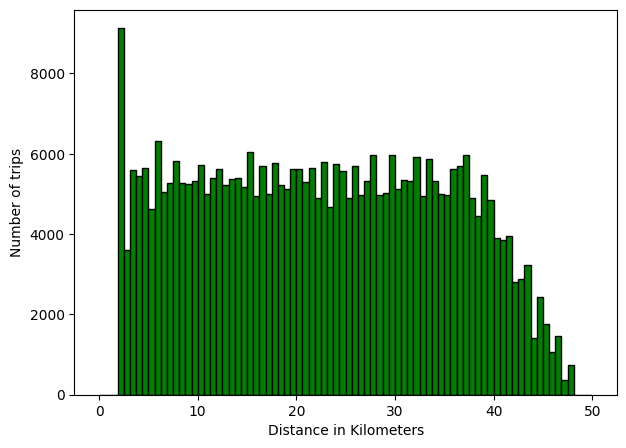

In [222]:
#plot distribution of KM_Travelled

plt.figure(figsize=[7, 5])
plt.hist(MasterData['KM_Travelled'], bins=80, range=(0,50), color='green', edgecolor='black')
plt.xlabel('Distance in Kilometers')
plt.ylabel('Number of trips')

plt.show()

From the above graph we can derive that cab rides ranges between distance of 2 to 48 kms. Also count of long distance rides drastically decreases after a ride distance of 40 kms.

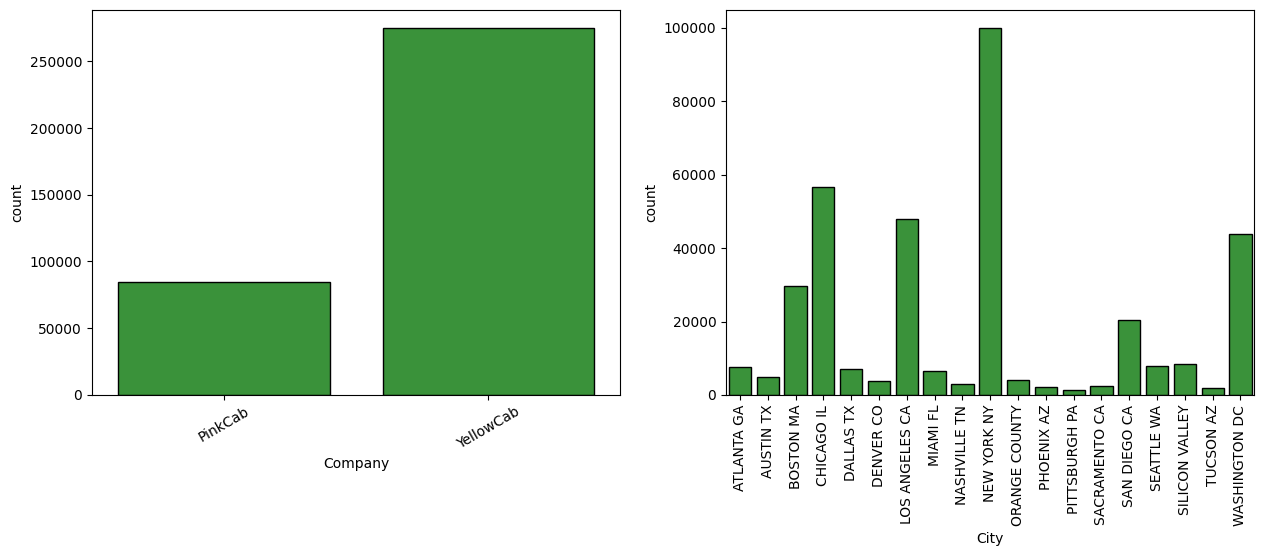

In [223]:
plt.figure(figsize = [15,5])
green=sns.color_palette()[2]

# Company
plt.subplot(1,2,1)
p=sns.countplot(data=MasterData, x='Company', color=green, edgecolor='black')
plt.xticks(rotation=30)

# City
plt.subplot(1,2,2)
p=sns.countplot(data=MasterData, x='City', color=green, edgecolor='black')
plt.xticks(rotation=90)

plt.show()

Count of pink cab rides are about 80000 and yellow cab rides is over 2.5 lakhs.
Also the city with the largest number of cab rides is New York.

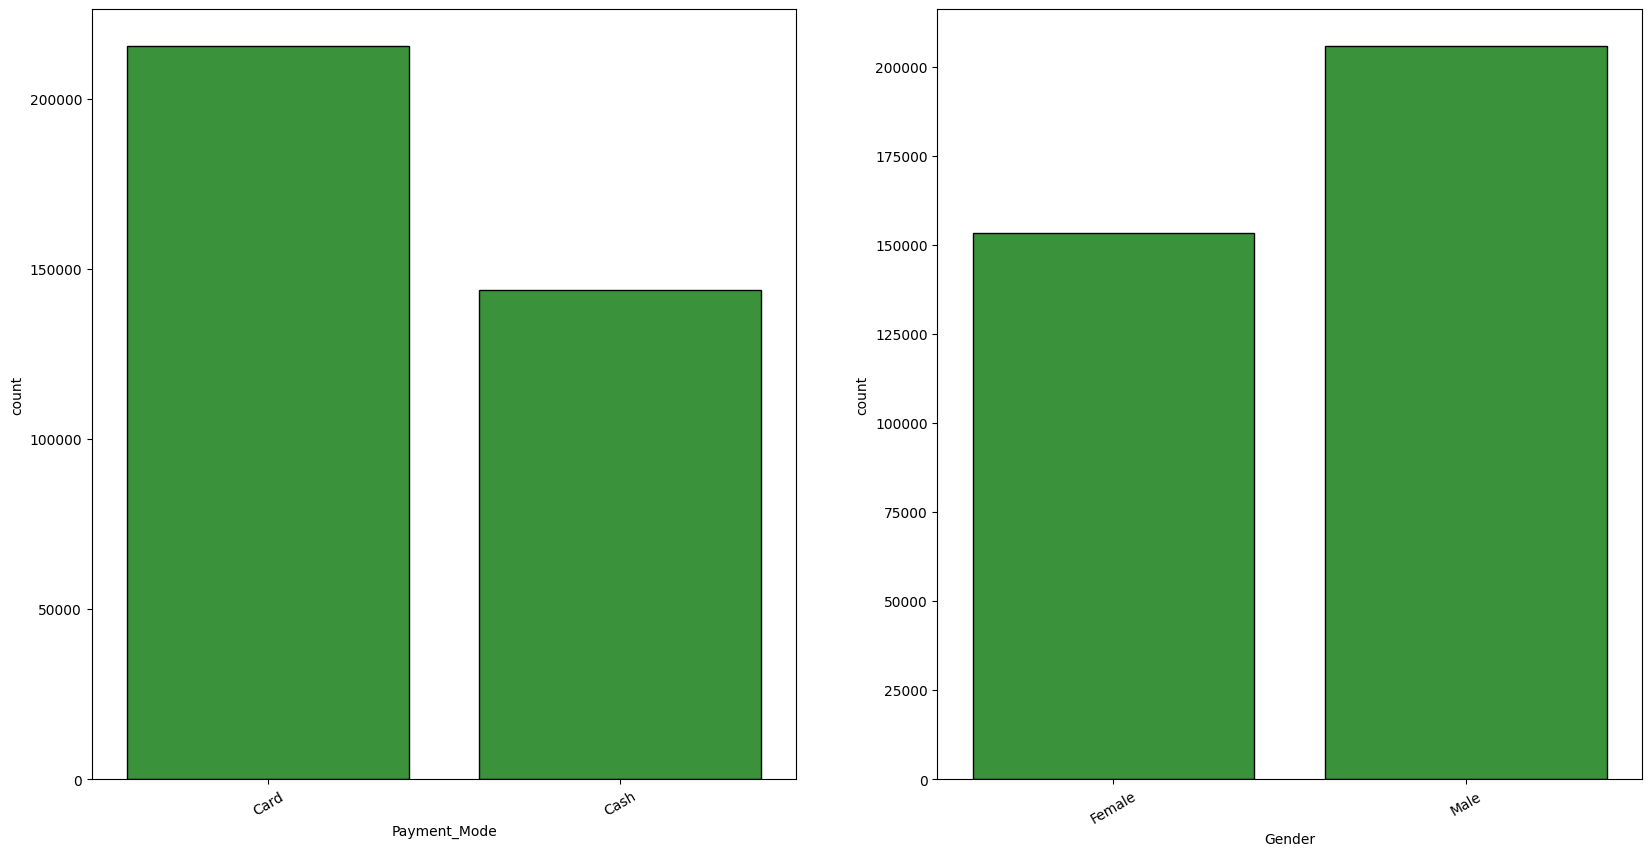

In [224]:
plt.figure(figsize = [20,10])
green=sns.color_palette()[2]

#Payment_mode
plt.subplot(1,2,1)
p=sns.countplot(data=MasterData, x='Payment_Mode', color=green, edgecolor='black')
plt.xticks(rotation=30)

# Passholder_type
plt.subplot(1,2,2)
p=sns.countplot(data=MasterData, x='Gender', color=green, edgecolor='black')
plt.xticks(rotation=30)

plt.show()

Number of card payments is over 2 lakhs where as cash transactions are about 1.5 lakhs.
Number of Male passengers is over 2 lakhs, greater than Female passengers by about 50 thousand.

In [241]:
MasterData['Price_Charged'].describe()

count    359392.000000
mean        423.443311
std         274.378911
min          15.600000
25%         206.437500
50%         386.360000
75%         583.660000
max        2048.030000
Name: Price_Charged, dtype: float64

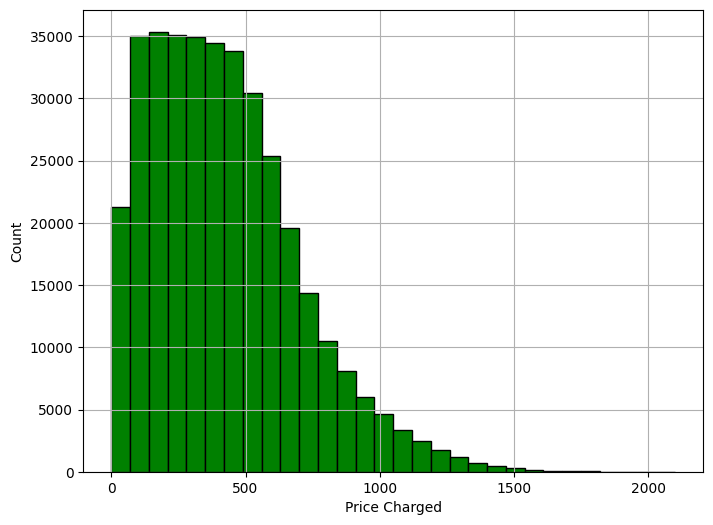

In [225]:
# Price_Charged distribution
plt.figure(figsize=[8, 6])
MasterData['Price_Charged'].hist(bins=30, range=(0,2100), color='green', edgecolor='black')
plt.xlabel('Price Charged')
plt.ylabel('Count')
plt.show()

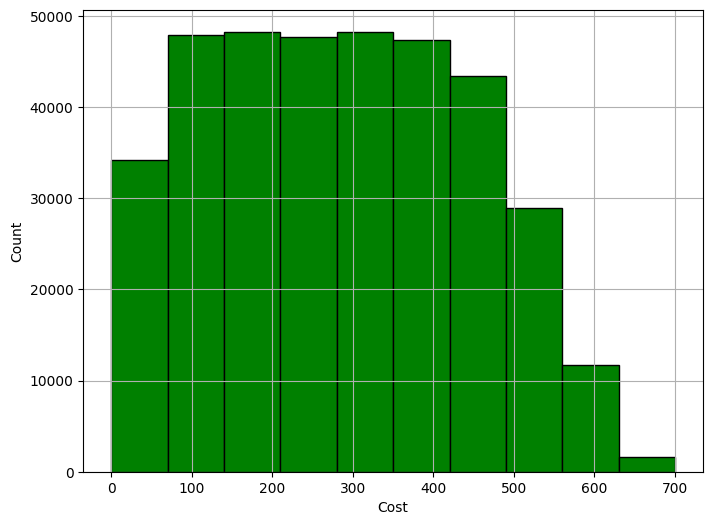

In [226]:
# Cost distribution
plt.figure(figsize=[8, 6])
MasterData['Cost_of_Trip'].hist( range=(0,700), color='green', edgecolor='black')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

In [227]:
MasterData['Cost_of_Trip'].describe()

count    359392.000000
mean        286.190113
std         157.993661
min          19.000000
25%         151.200000
50%         282.480000
75%         413.683200
max         691.200000
Name: Cost_of_Trip, dtype: float64

In [228]:
MasterData['Income_(USD/Month)'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income_(USD/Month), dtype: float64

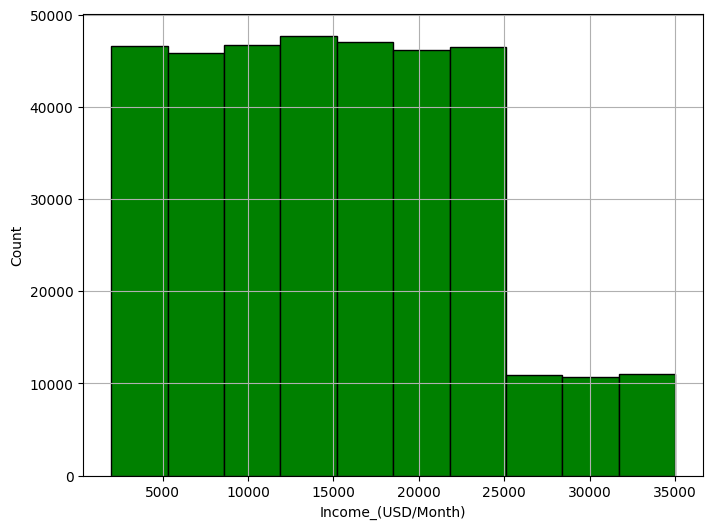

In [229]:
# Income_(USD/Month) distribution
plt.figure(figsize=[8, 6])
MasterData['Income_(USD/Month)'].hist(  color='green', edgecolor='black')
plt.xlabel('Income_(USD/Month)')
plt.ylabel('Count')
plt.show()

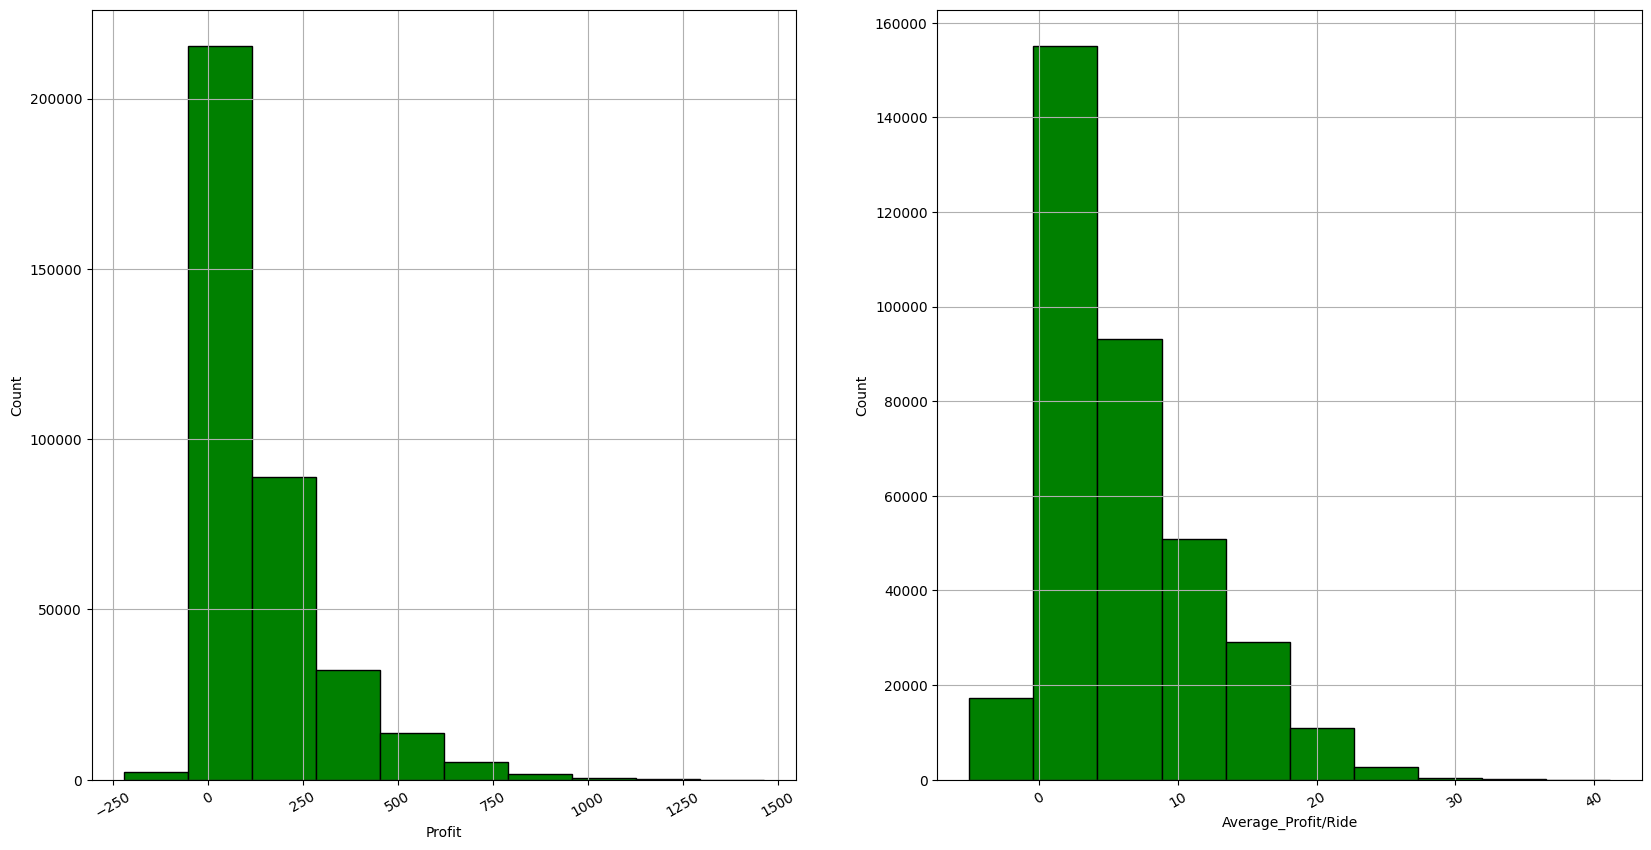

In [230]:
# Profit distribution

plt.figure(figsize = [20,10])
green=sns.color_palette()[2]

#Profit
plt.subplot(1,2,1)
MasterData['Profit'].hist(  color='green', edgecolor='black')
plt.xticks(rotation=30)
plt.xlabel('Profit')
plt.ylabel('Count')

# Average Profit
plt.subplot(1,2,2)
MasterData['Average_Profit/Ride'].hist(  color='green', edgecolor='black')
plt.xticks(rotation=30)
plt.xlabel('Average_Profit/Ride')
plt.ylabel('Count')

plt.show()

<Axes: xlabel='Income_(USD/Month)', ylabel='Count'>

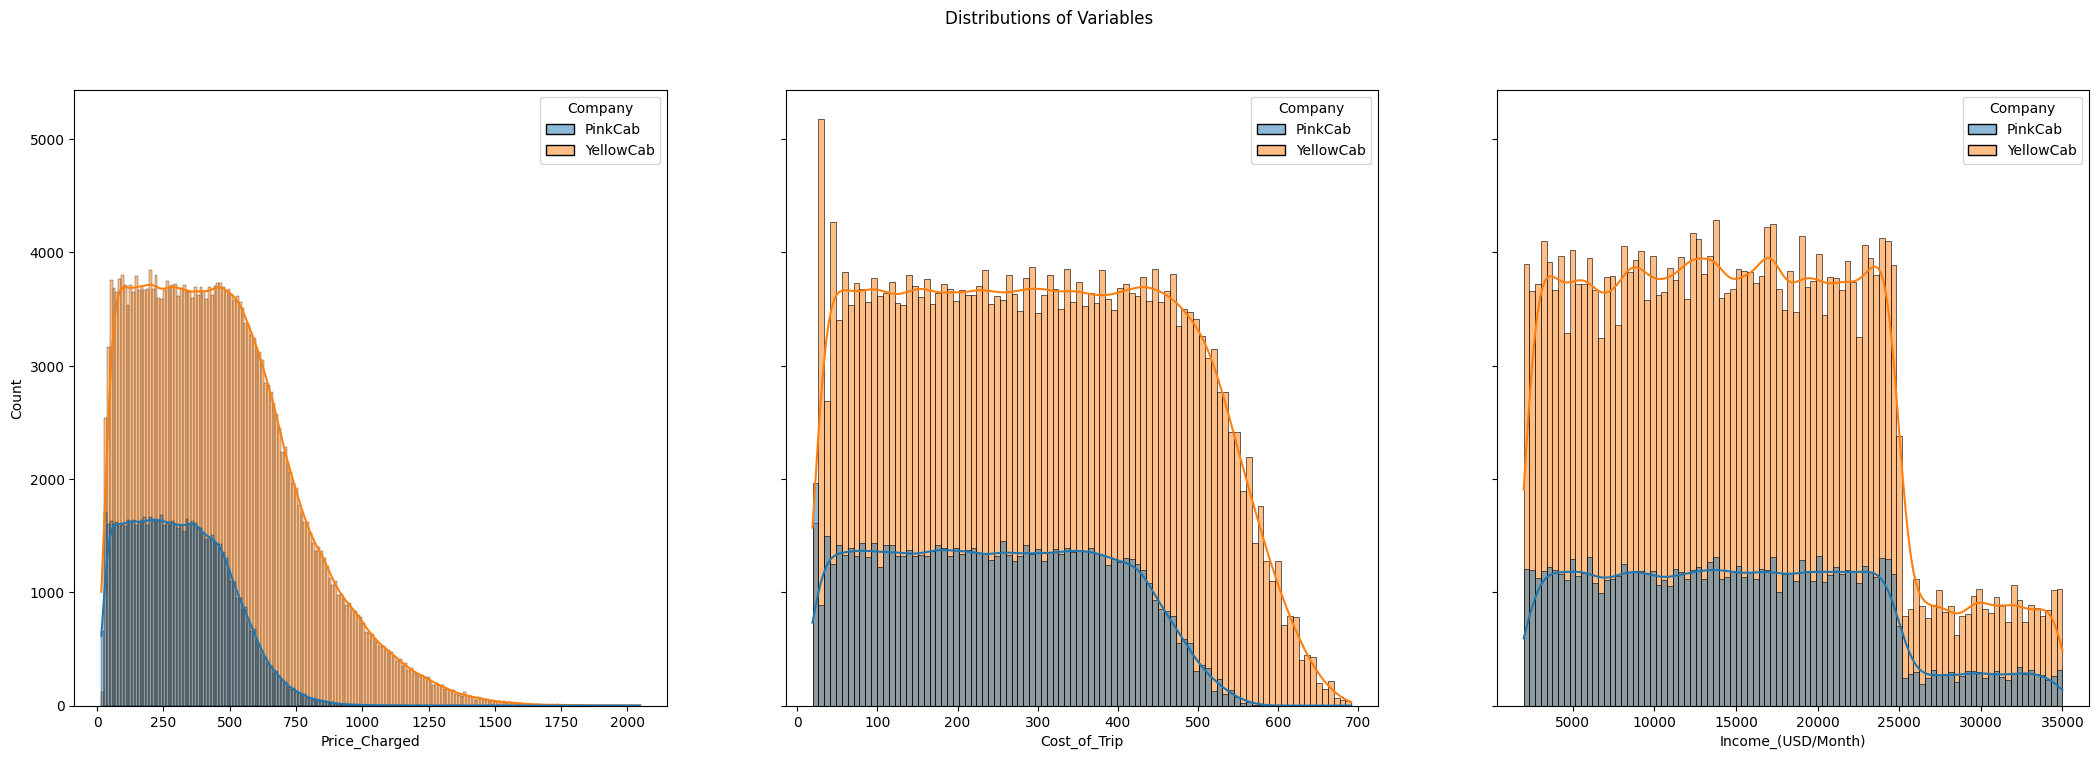

In [231]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 3 , figsize=(26,8), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=MasterData , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[2], data=MasterData , x='Income_(USD/Month)' , kde = True , hue="Company")

Price charged in Yellow cabs is higher than price charged in red cabs.

Cost of trips in Yellow cabs is higher than price charged in red cabs.



<Axes: xlabel='Age', ylabel='Count'>

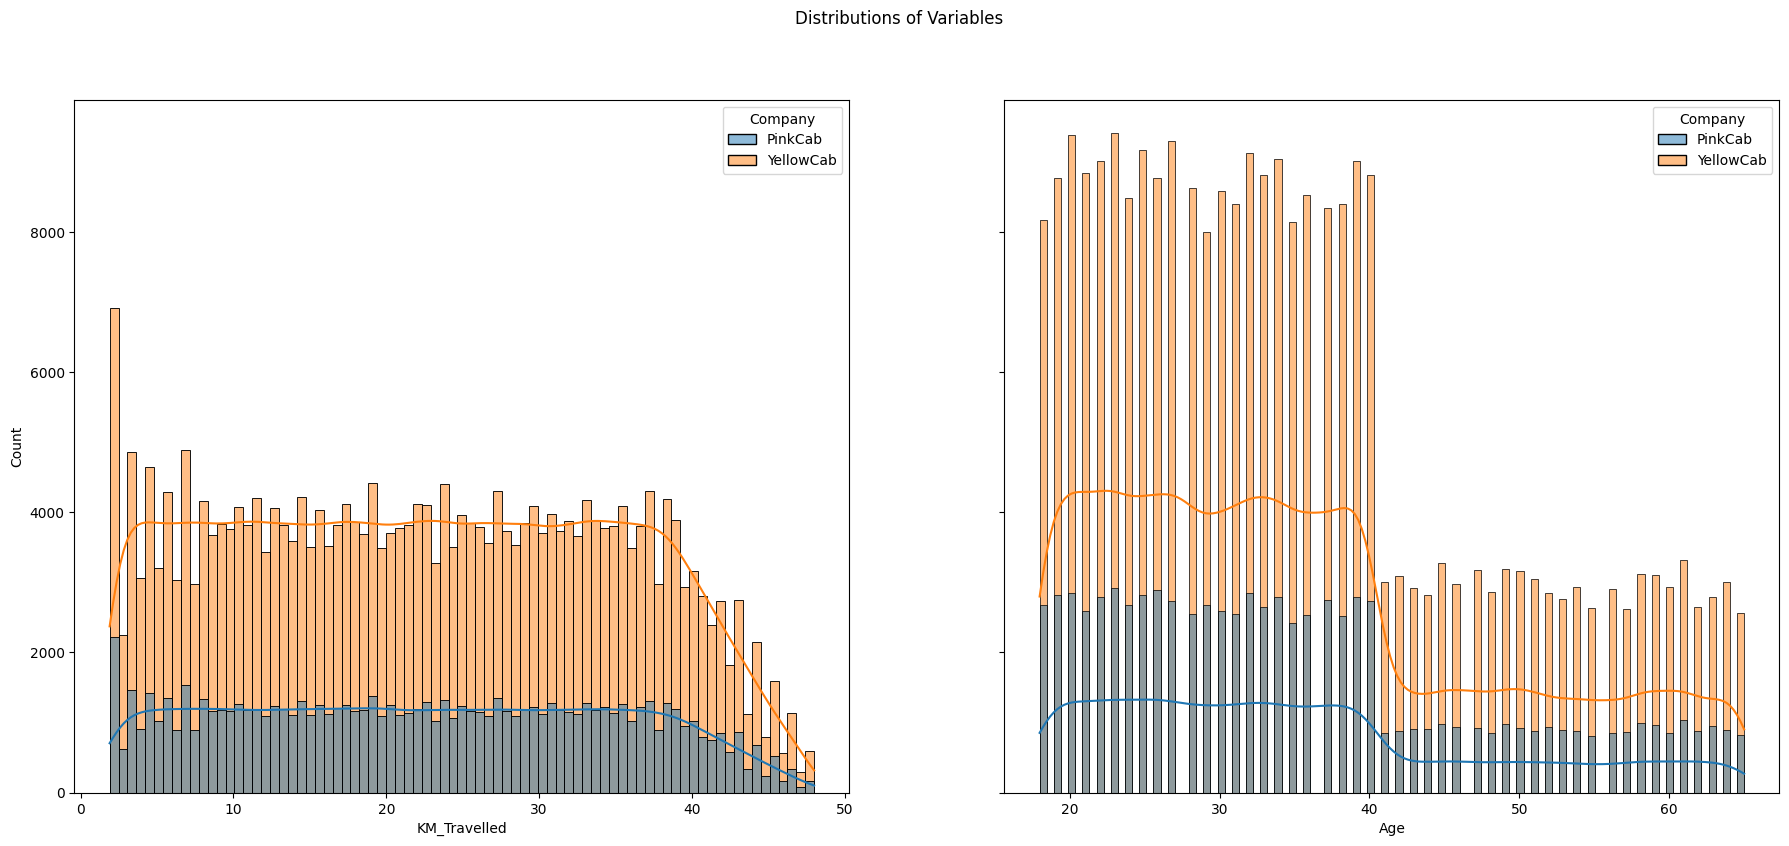

In [232]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 ,figsize=(22,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0],data=MasterData , x='KM_Travelled' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='Age' , kde = True , hue="Company")

<Axes: xlabel='Population', ylabel='Count'>

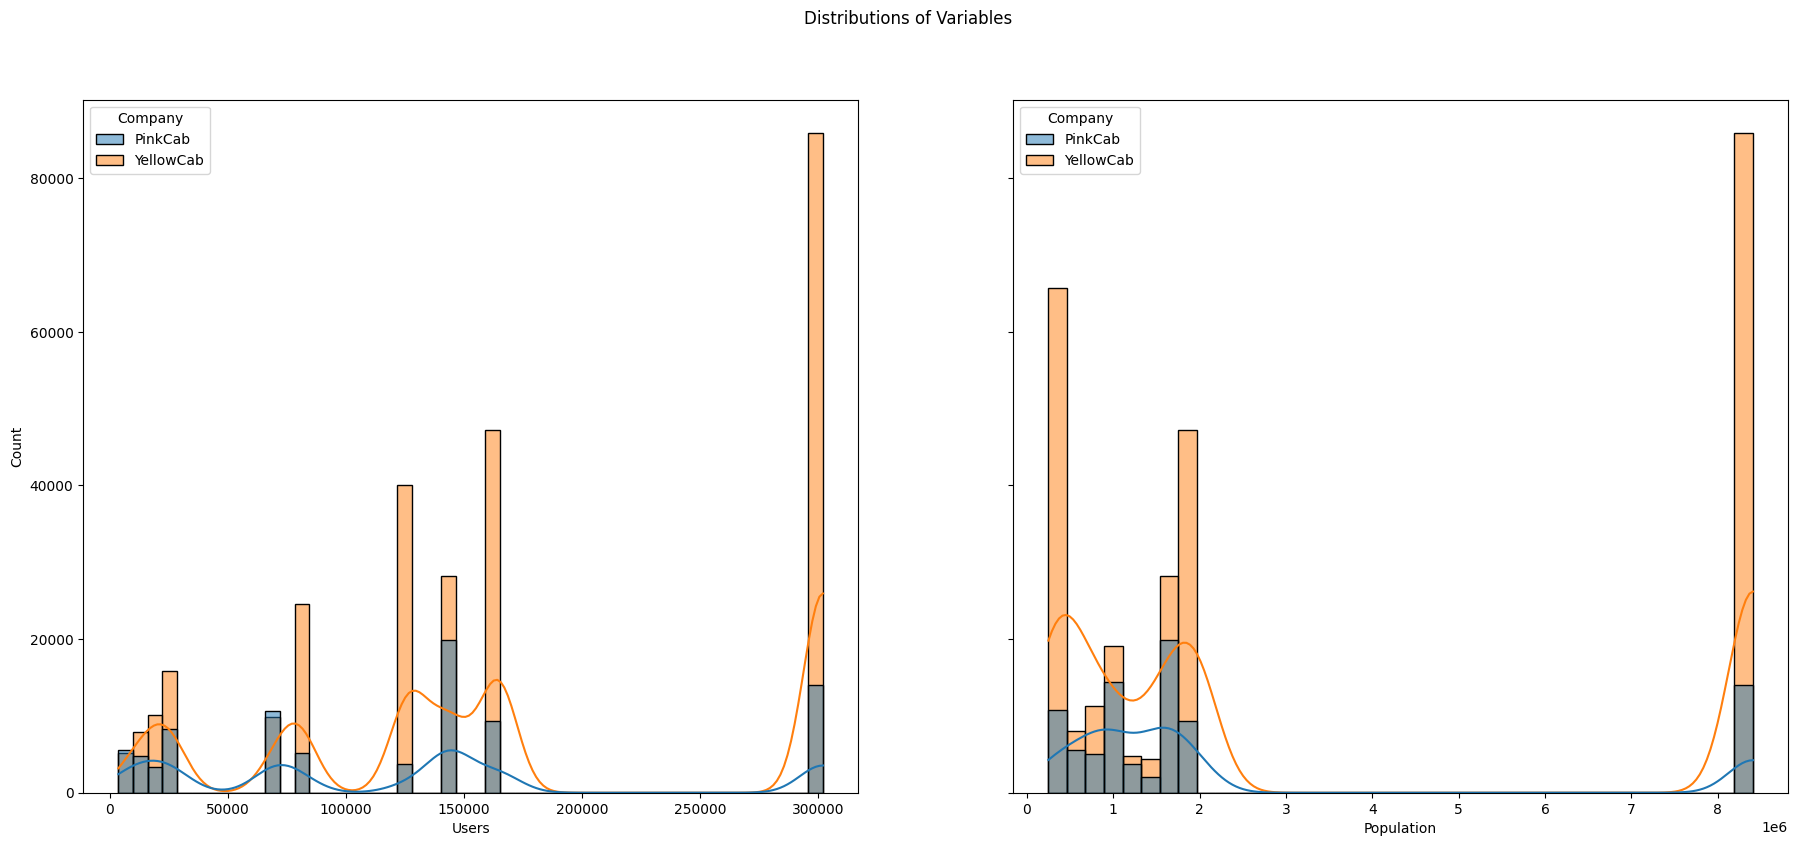

In [233]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 , figsize=(22 ,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=MasterData , x='Users' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=MasterData , x='Population' , kde = True , hue="Company")

## Bivariate Analysis

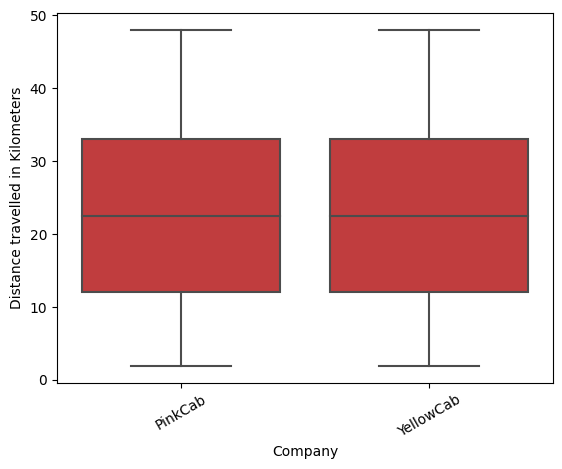

In [240]:
#Analysis of KM_Travelled among company
sns.boxplot(data=MasterData, x='Company', y='KM_Travelled', color=green);
plt.xlabel('Company')
plt.ylabel('Distance travelled in Kilometers')
plt.xticks(rotation=30)
plt.show()

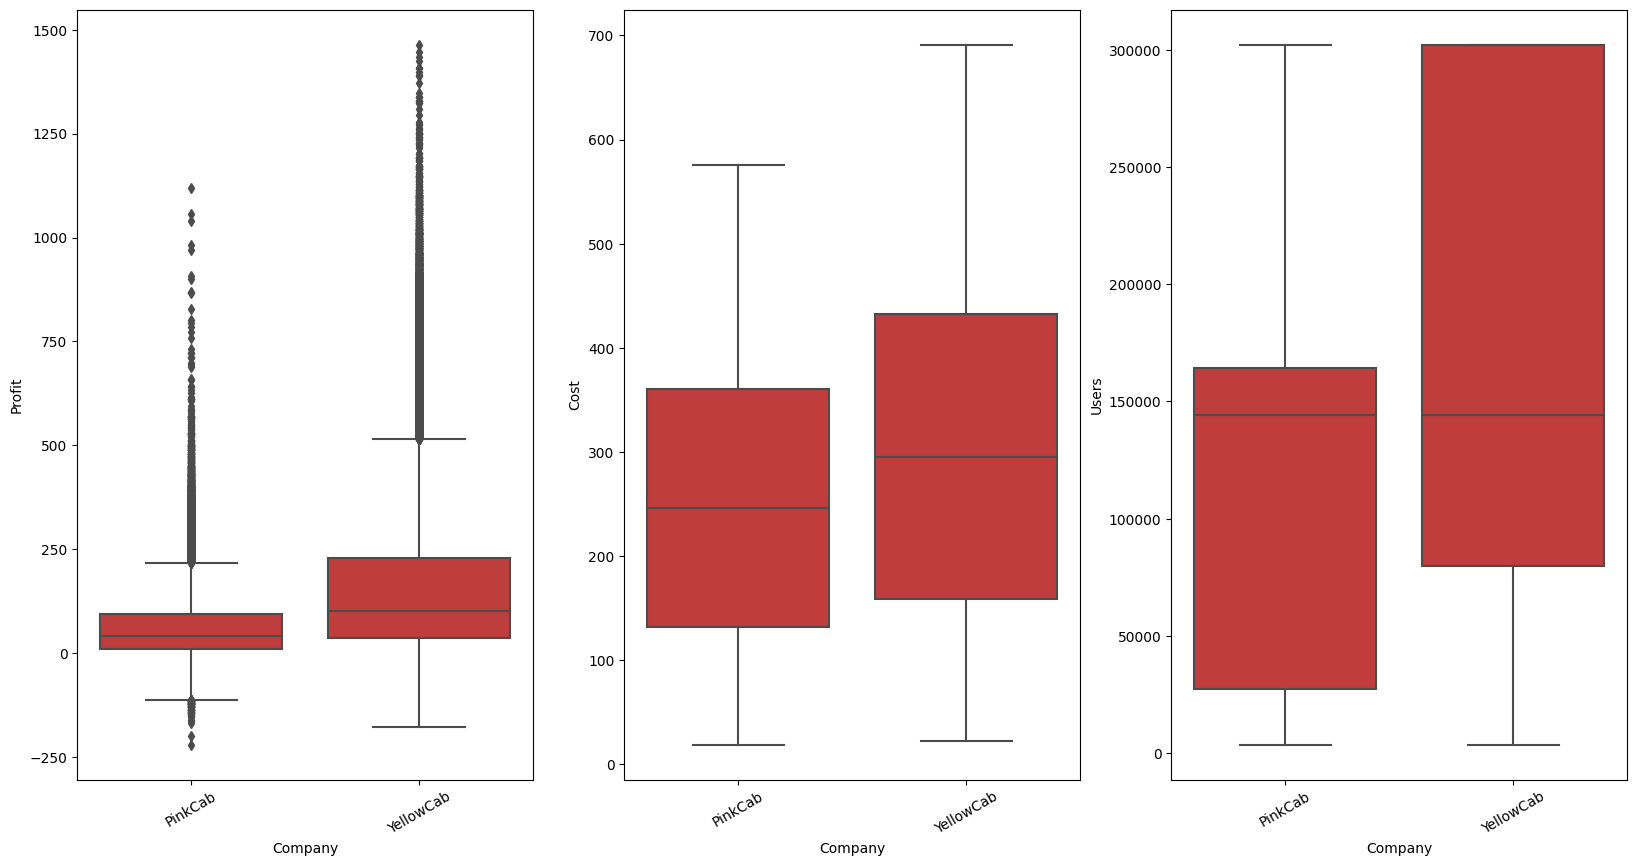

In [235]:
#Analysis of Cost Users and Profit among company

plt.figure(figsize = [20,10])
green=sns.color_palette()[3]

plt.subplot(1,3,1)
sns.boxplot(data=MasterData, x='Company', y='Profit', color=green);
plt.xlabel('Company')
plt.ylabel('Profit')
plt.xticks(rotation=30)

plt.subplot(1,3,2)
sns.boxplot(data=MasterData, x='Company', y='Cost_of_Trip', color=green);
plt.xlabel('Company')
plt.ylabel('Cost')
plt.xticks(rotation=30)

plt.subplot(1,3,3)
sns.boxplot(data=MasterData, x='Company', y='Users', color=green);
plt.xlabel('Company')
plt.ylabel('Users')
plt.xticks(rotation=30)

plt.show()

Yellow cabs have a higher profit margin than pink cabs.

Mean cost in yellow cabs is higher than mean cost in pink cabs.

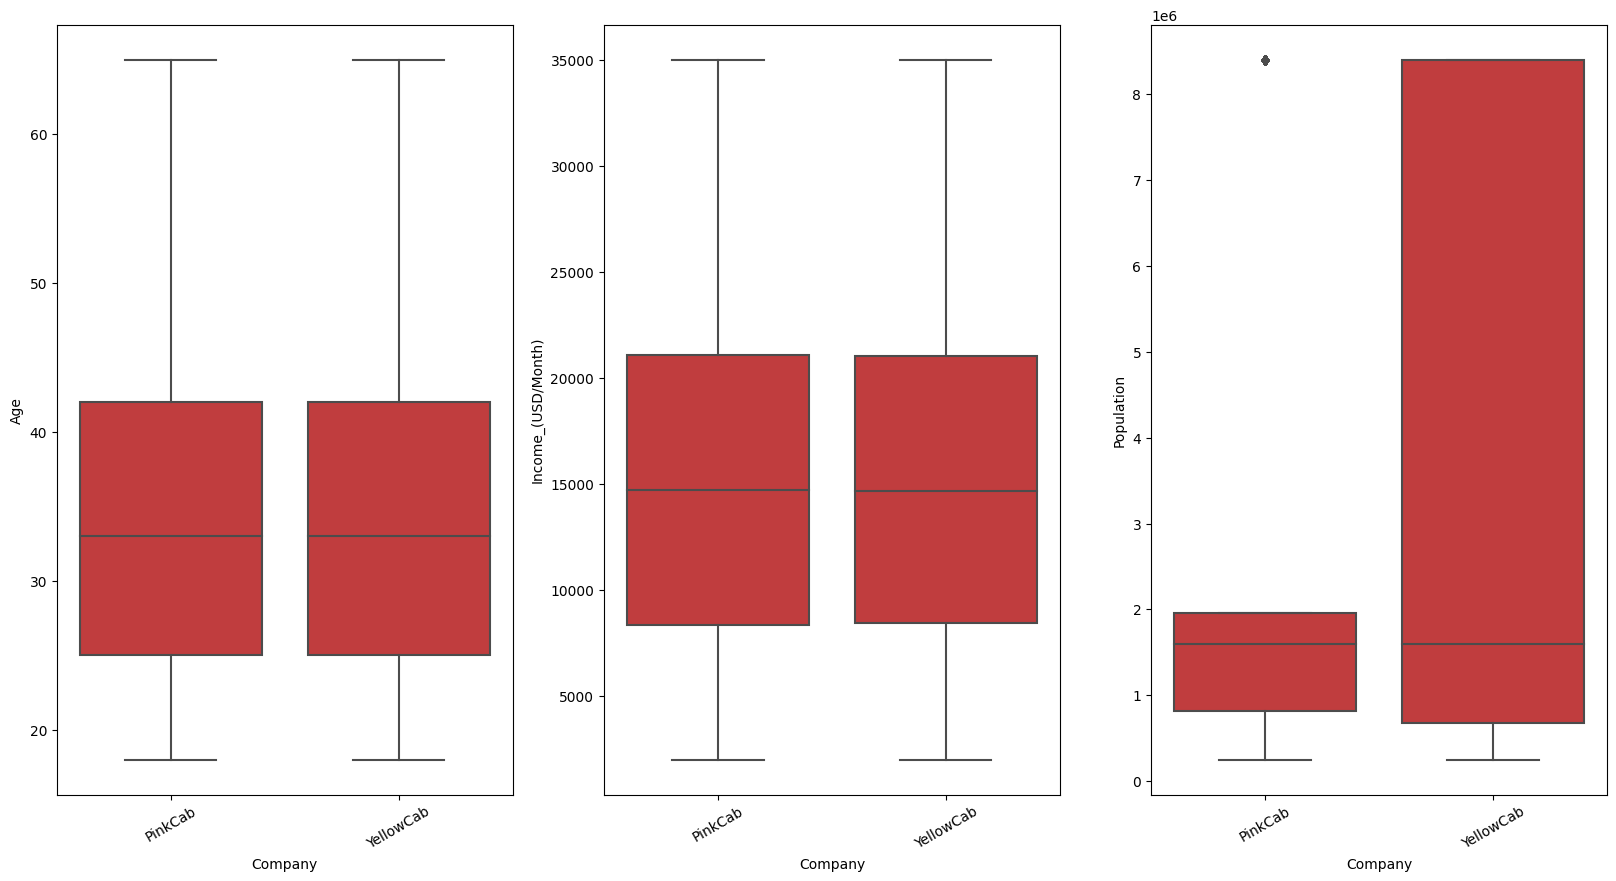

In [236]:
#Analysis of Age income and population among company

plt.figure(figsize = [20,10])
green=sns.color_palette()[3]

plt.subplot(1,3,1)
sns.boxplot(data=MasterData, x='Company', y='Age', color=green);
plt.xlabel('Company')
plt.ylabel('Age')
plt.xticks(rotation=30)

plt.subplot(1,3,2)
sns.boxplot(data=MasterData, x='Company', y='Income_(USD/Month)', color=green);
plt.xlabel('Company')
plt.ylabel('Income_(USD/Month)')
plt.xticks(rotation=30)

plt.subplot(1,3,3)
sns.boxplot(data=MasterData, x='Company', y='Population', color=green);
plt.xlabel('Company')
plt.ylabel('Population')
plt.xticks(rotation=30)

plt.show()

In [ ]:
#Distance is one of the important factors, which drives the price of the rides. 
#We could see that there is a positive correlation in the graph for both Pink and Yellow cab.
#The price for Yellow cab is higher compared to Pink cab.

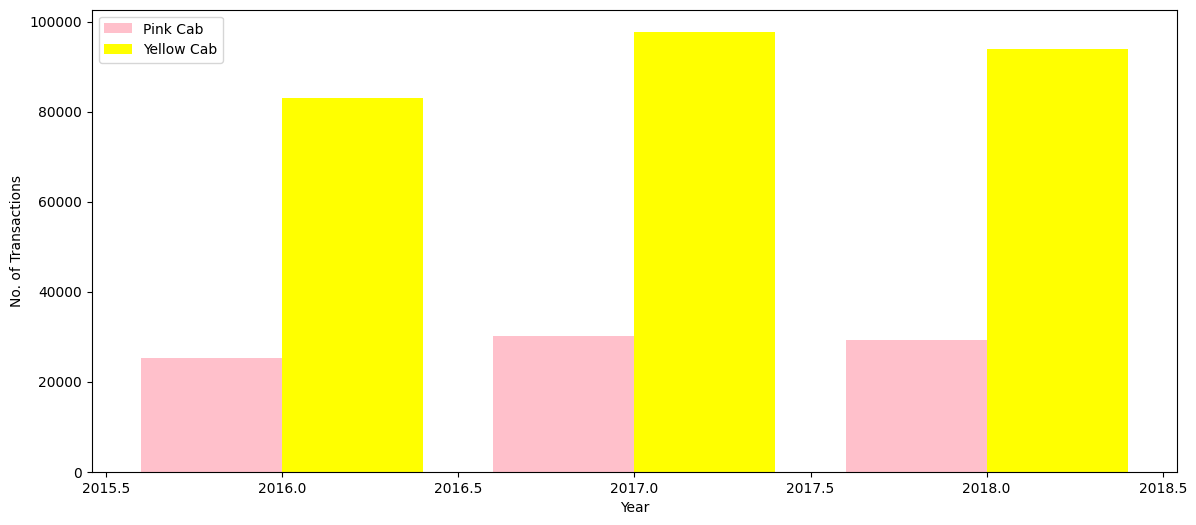

In [27]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('year').Transaction_ID.count()
plot2 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

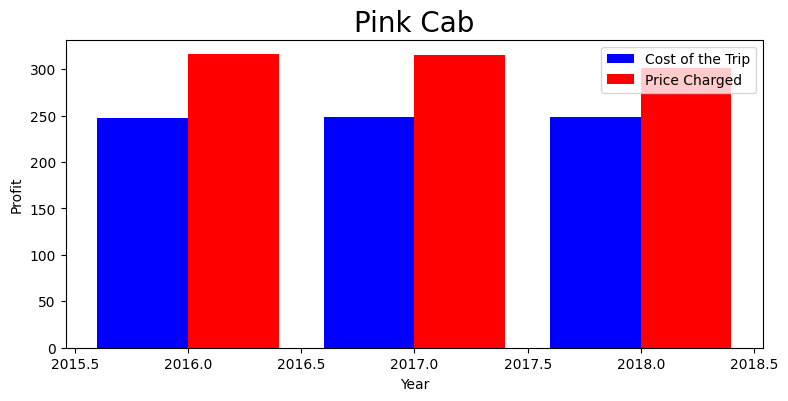

In [30]:
# From the graph it shows that on yearly basis no. of transactions for Yellow cab is higher than Pink cab.

plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

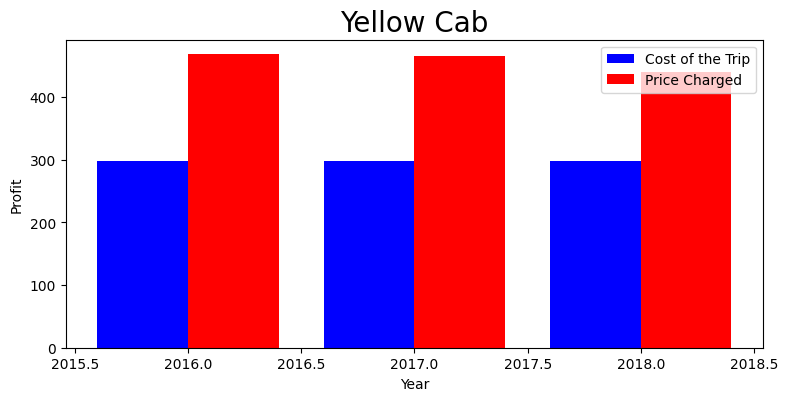

In [31]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

In [33]:
city_users = MasterData.groupby('City').Users.count()

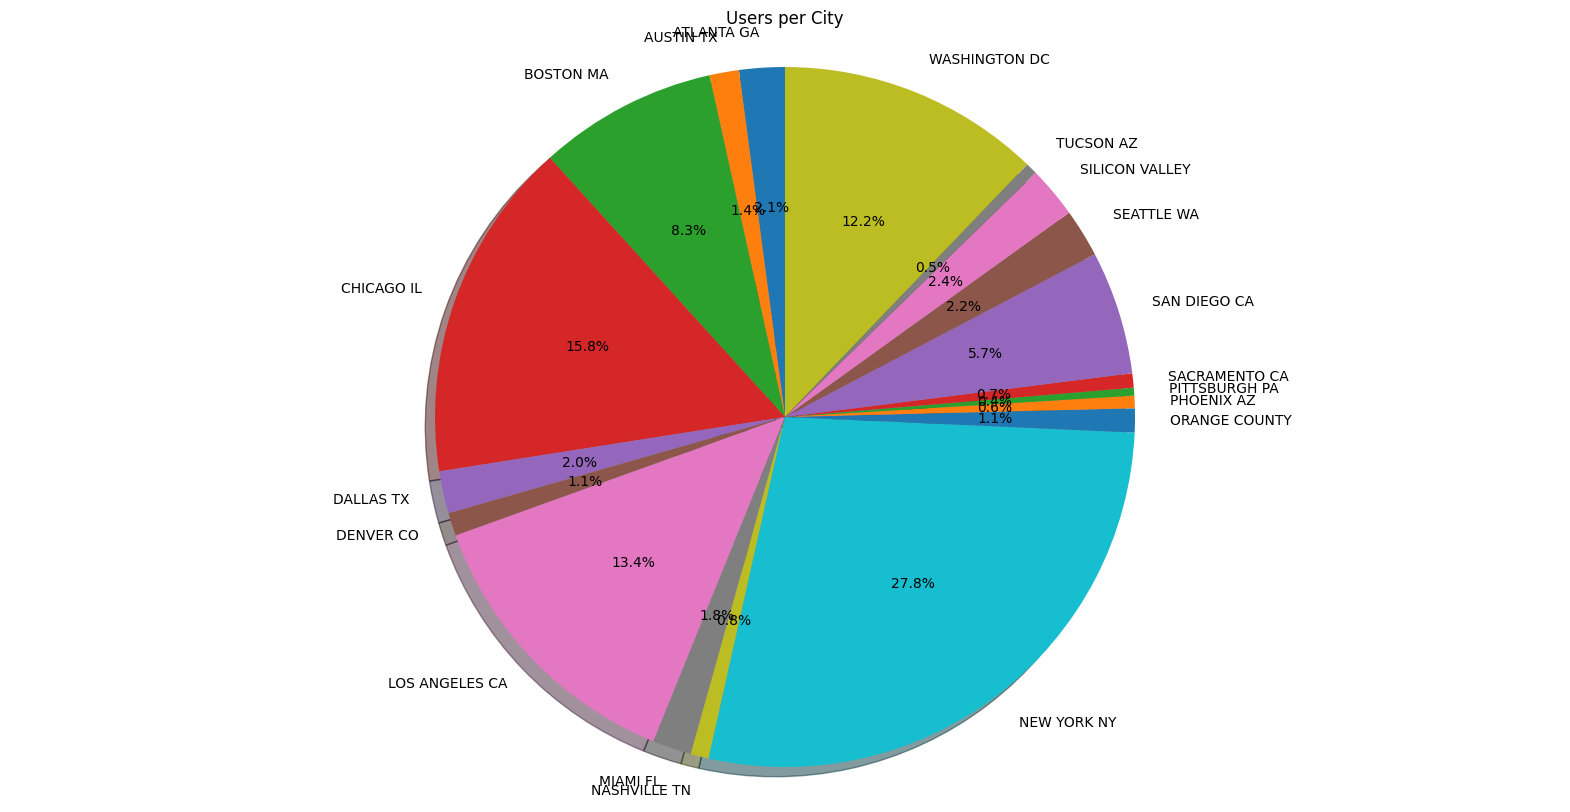

In [34]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users per City')
plt.show()

# New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%

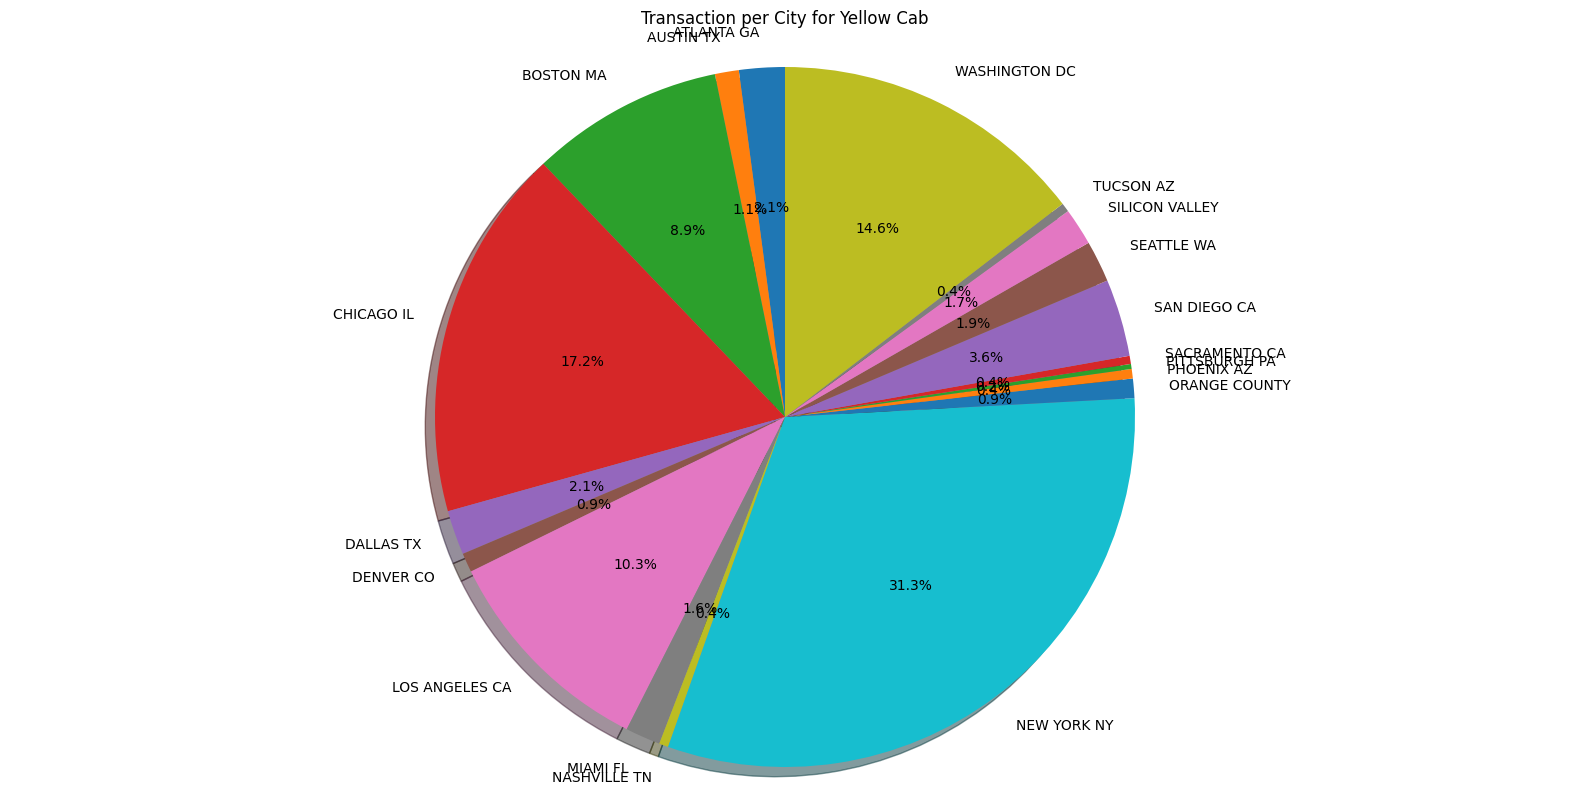

In [36]:
city_y = MasterData[MasterData.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()

labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

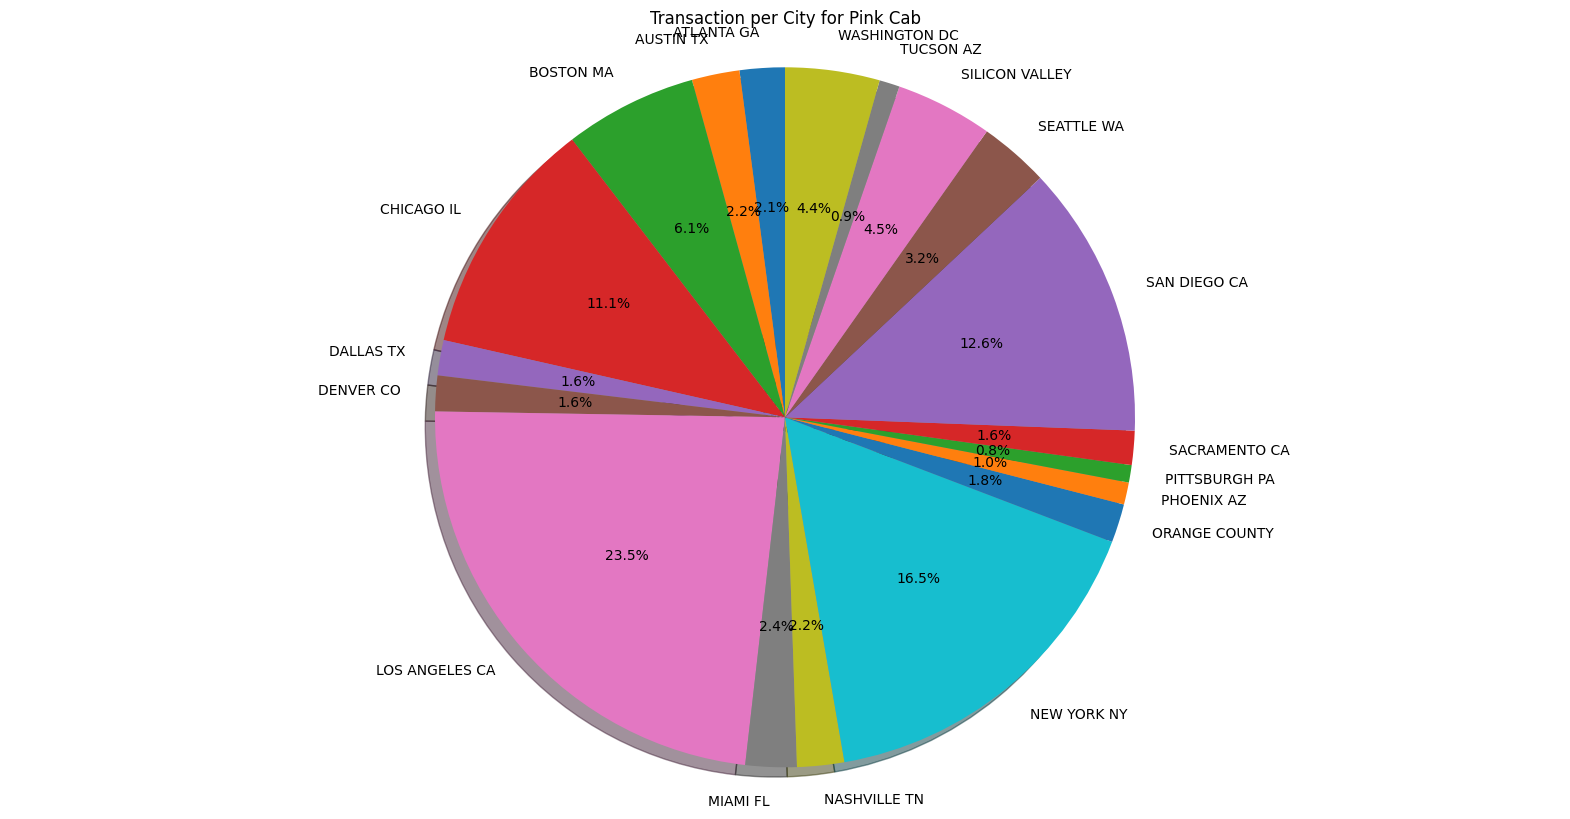

In [37]:
city_p = MasterData[MasterData.Company=='Pink Cab'].groupby('City').Transaction_ID.count()

labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

In [ ]:
#Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%
#Transaction for Pink Cab is highest in Los Angeles City

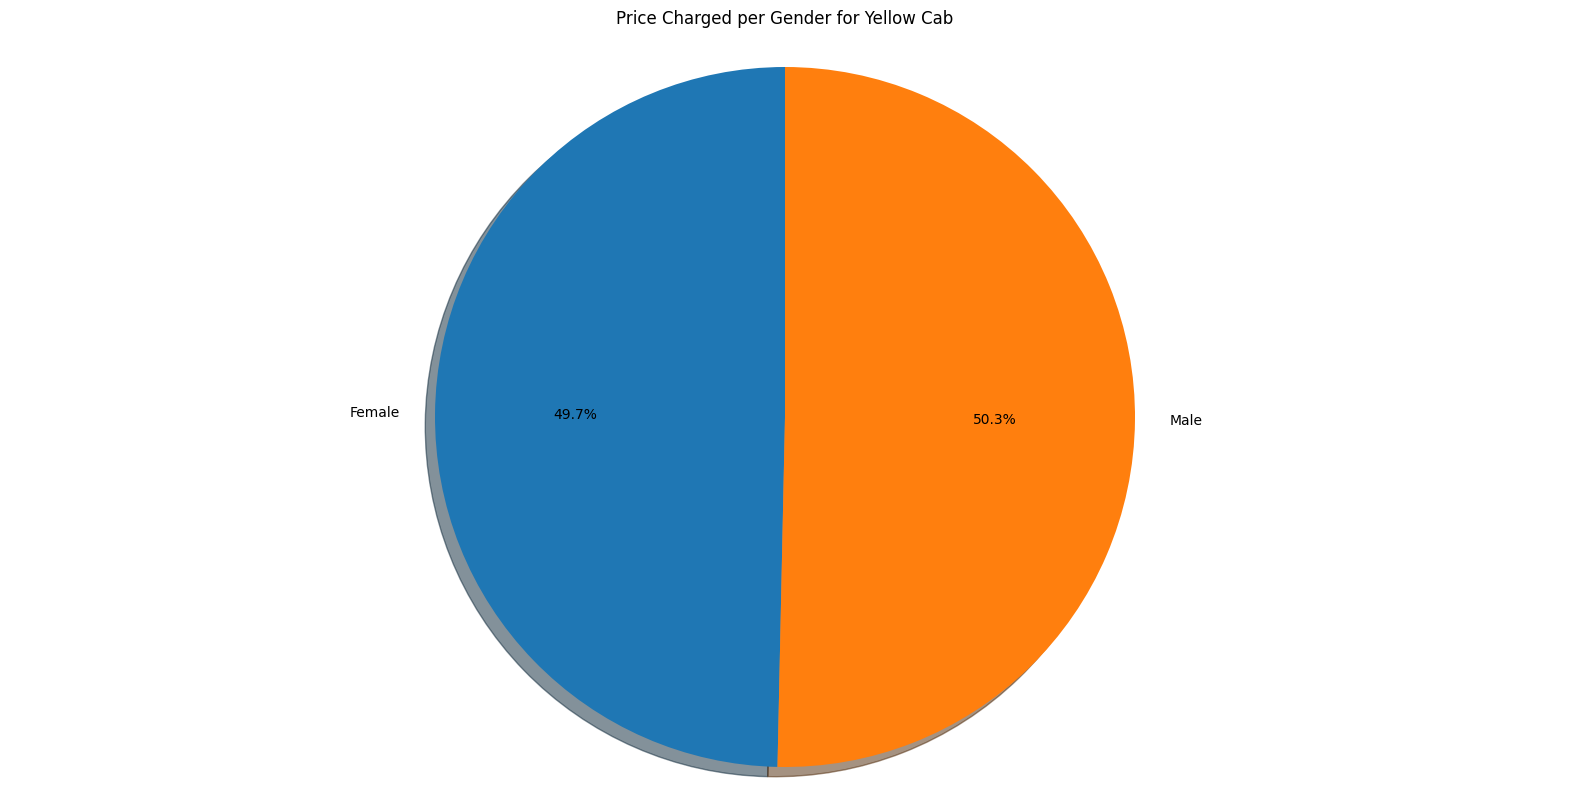

In [39]:
gender_y=MasterData[MasterData.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()

labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

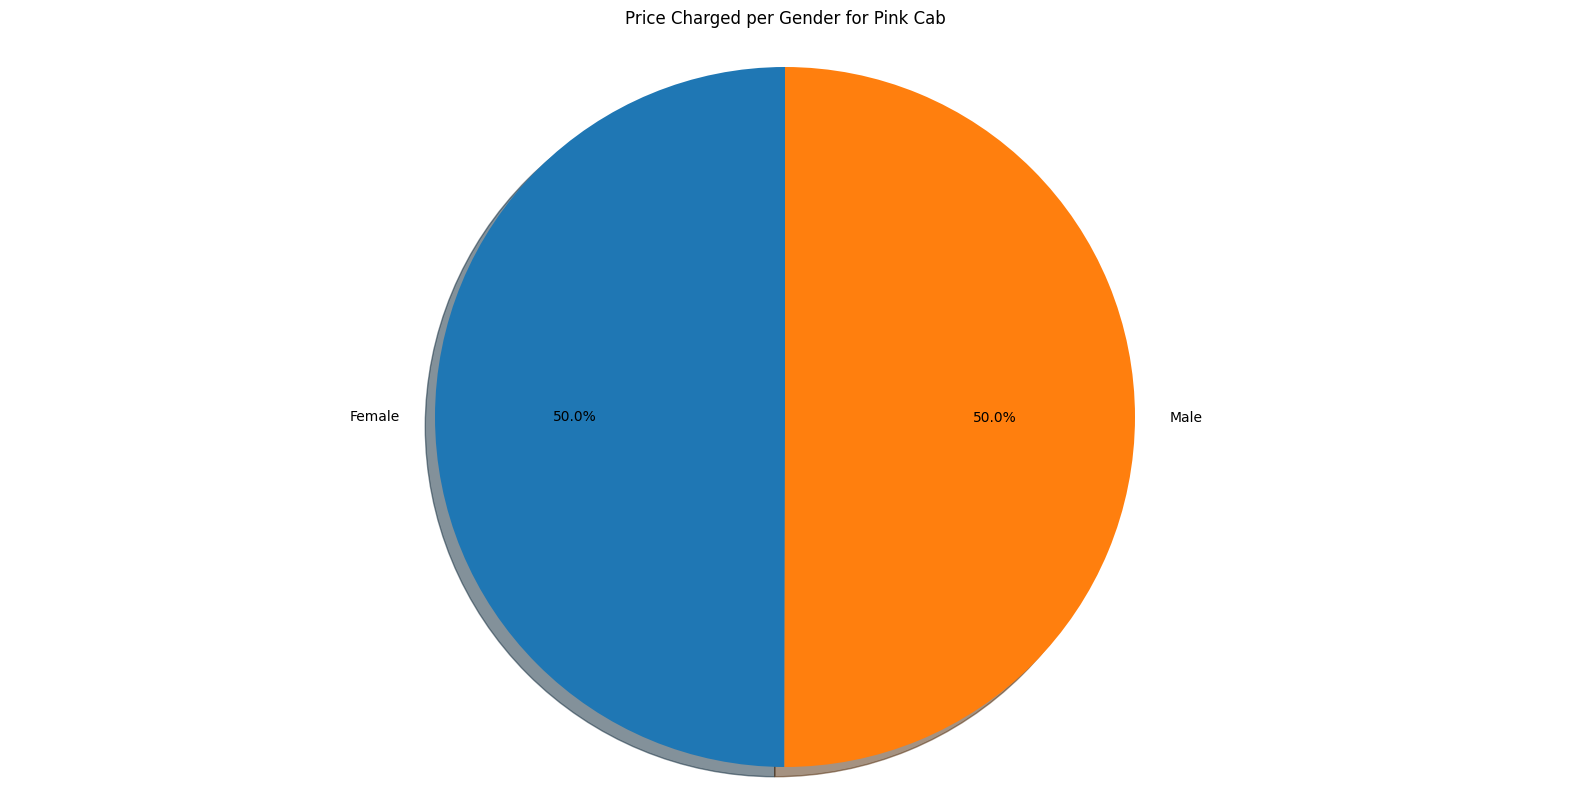

In [40]:
gender_p=MasterData[MasterData.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()

labs = gender_p.index
vals = gender_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()

In [ ]:
#Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.

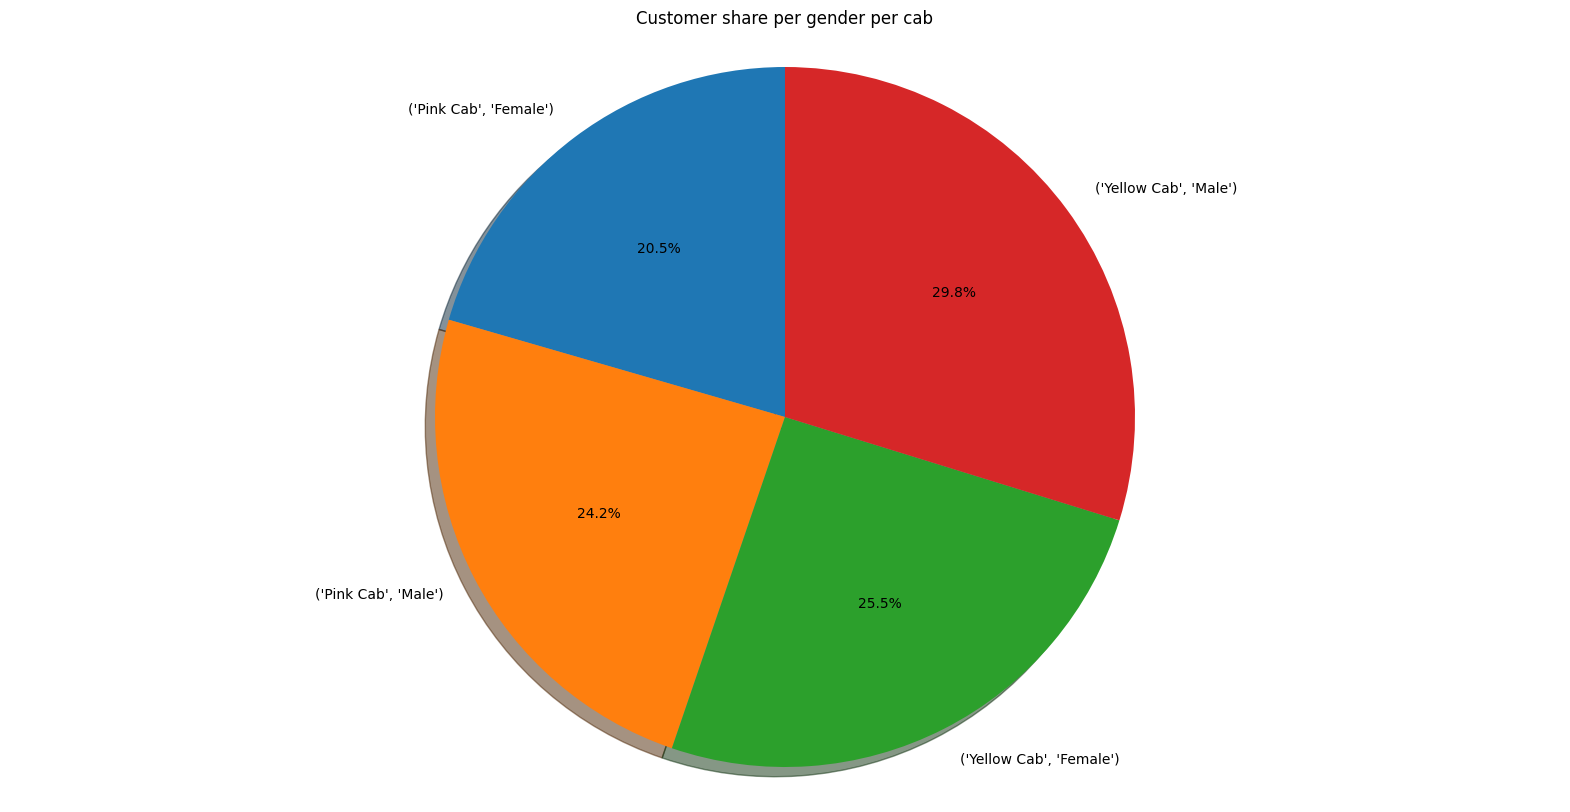

In [41]:
gender_cab=MasterData.groupby(['Company','Gender']).Customer_ID.nunique()

labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

## Multivariate Analysis

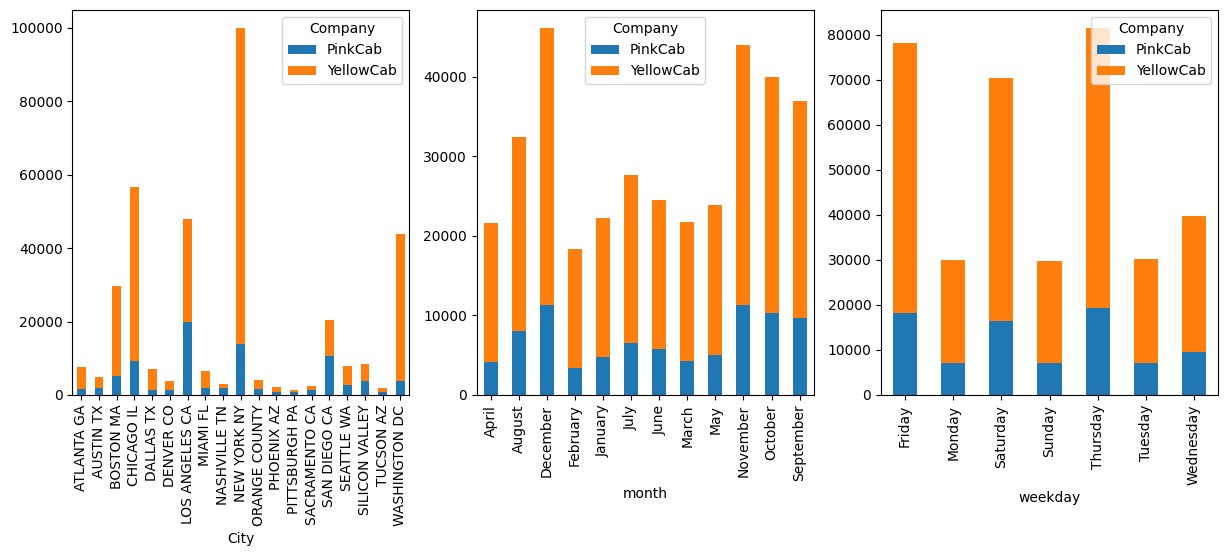

In [242]:
# Analysis of city and time series among cab company

plot=plt.figure(figsize=[20,5])
features = ['City', 'month', 'weekday']

for i, var in enumerate(features):
    sb = plot.add_subplot(1,4,i+1)
    MasterData.groupby([var,'Company'])[var].count().unstack('Company').plot(ax=sb, kind='bar', stacked=True)

In [262]:
month_01 = MasterData["month"].value_counts().sort_values()
weekday_01 = MasterData["weekday"].value_counts().sort_values()

<Axes: xlabel='month'>

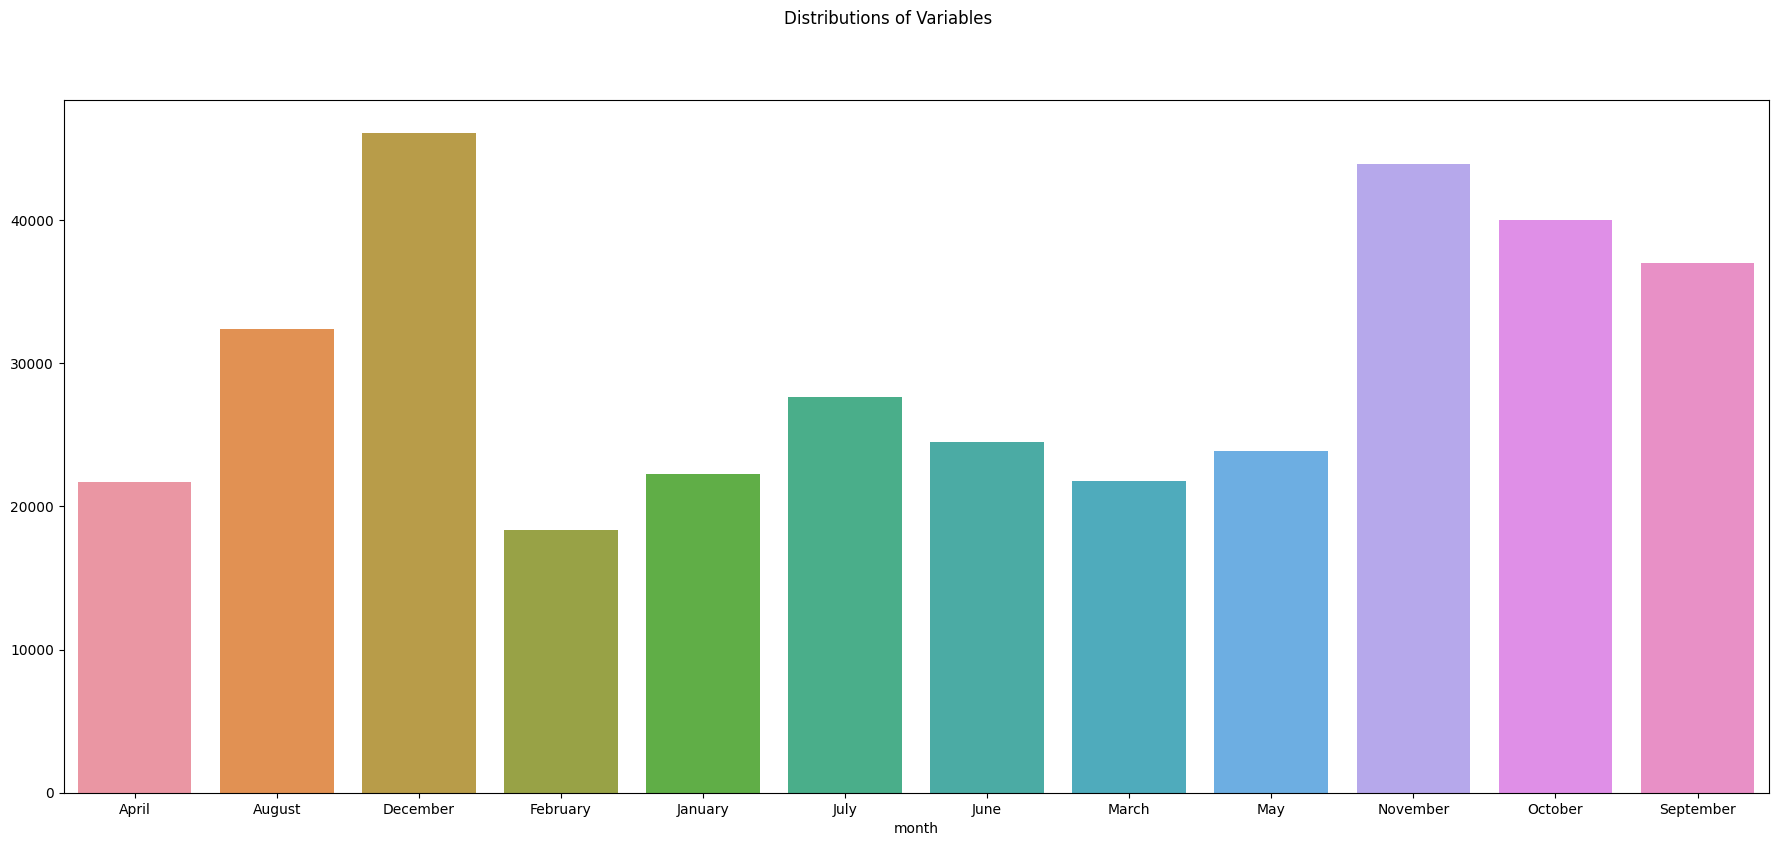

In [259]:
fig,axes = plt.subplots(figsize=(22,9), sharey=True, )
fig.suptitle('Distributions of Variables')
sns.barplot(x=month_01.index, y=month_01.values)


December has the highest number of cab users while in the month of February we can observe least number of cab users.

<Axes: xlabel='weekday'>

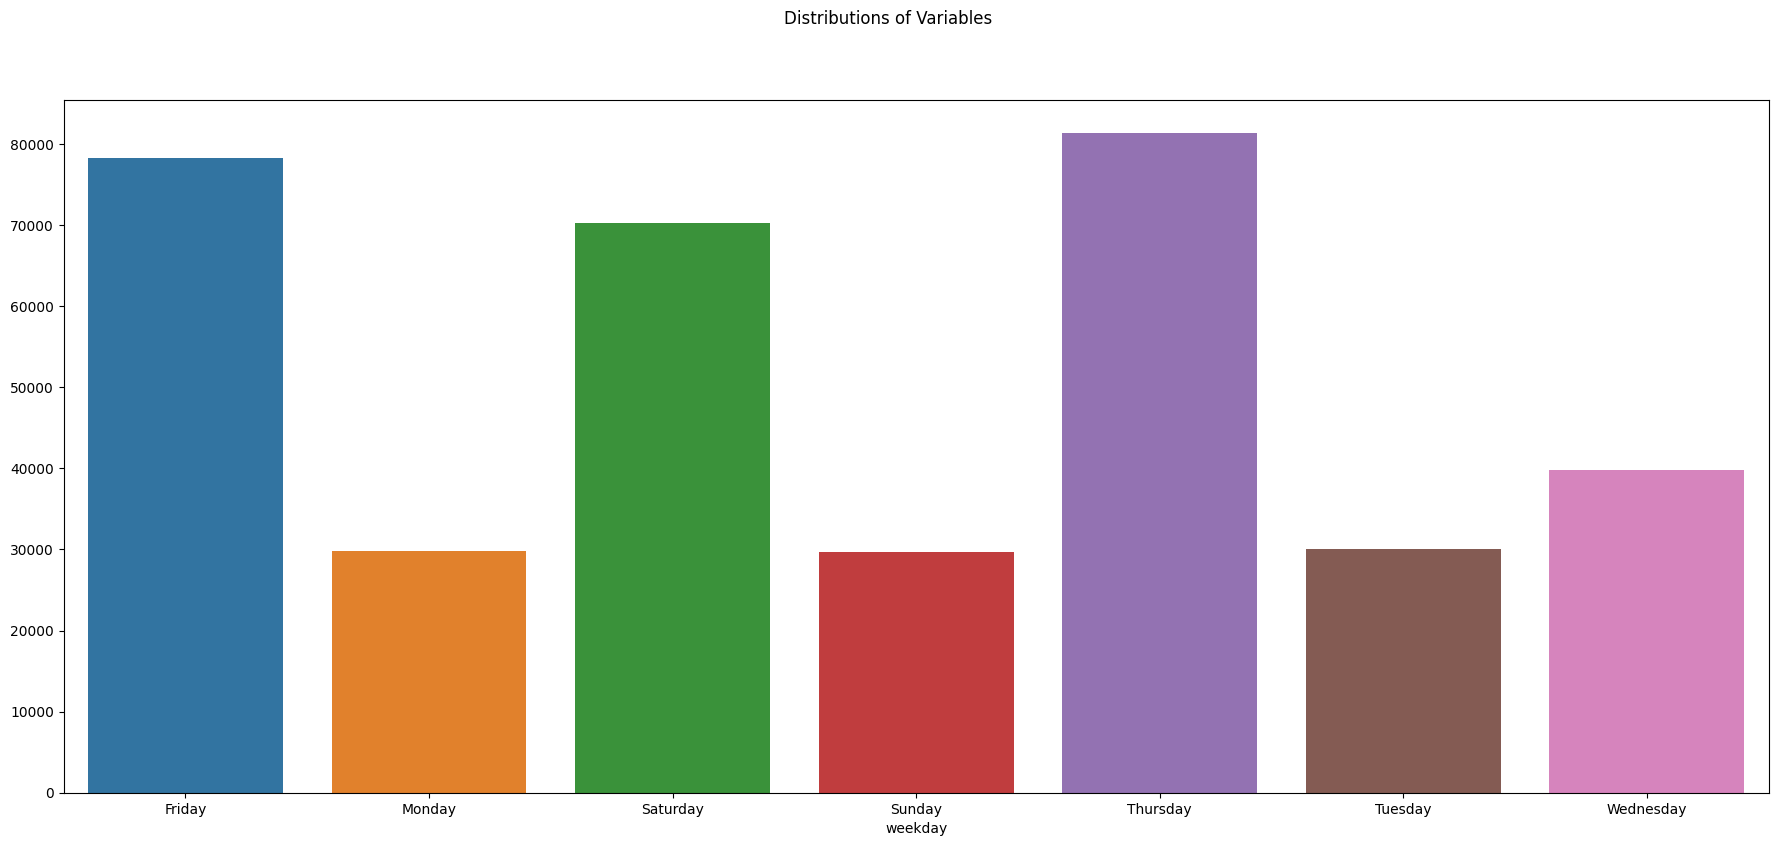

In [261]:
fig,axes = plt.subplots(figsize=(22,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.barplot(x=weekday_01.index, y=weekday_01.values)

Thursday seems to be the busiest day for cab companies while tuesday, sunday and monday seem to be least busiest days.

In [264]:
num_cols = MasterData[['KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'year', 'Age', 'Income_(USD/Month)', 'Profit', 'Average_Profit/Ride']]
num_cols.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,year,Age,Income_(USD/Month),Profit,Average_Profit/Ride
KM_Travelled,1.000000,0.835753,0.981848,-0.001094,-0.000369,-0.000544,0.462768,-0.000538
Price_Charged,0.835753,1.000000,0.859812,-0.036903,-0.003084,0.003228,0.864154,0.473222
Cost_of_Trip,0.981848,0.859812,1.000000,-0.001766,-0.000189,-0.000633,0.486056,0.031053
year,-0.001094,-0.036903,-0.001766,1.000000,-0.000497,-0.001679,-0.061420,-0.077548
Age,-0.000369,-0.003084,-0.000189,-0.000497,1.000000,0.003907,-0.005093,-0.006428
Income_(USD/Month),-0.000544,0.003228,-0.000633,-0.001679,0.003907,1.000000,0.006148,0.008159
Profit,0.462768,0.864154,0.486056,-0.061420,-0.005093,0.006148,1.000000,0.779330
Average_Profit/Ride,-0.000538,0.473222,0.031053,-0.077548,-0.006428,0.008159,0.779330,1.000000


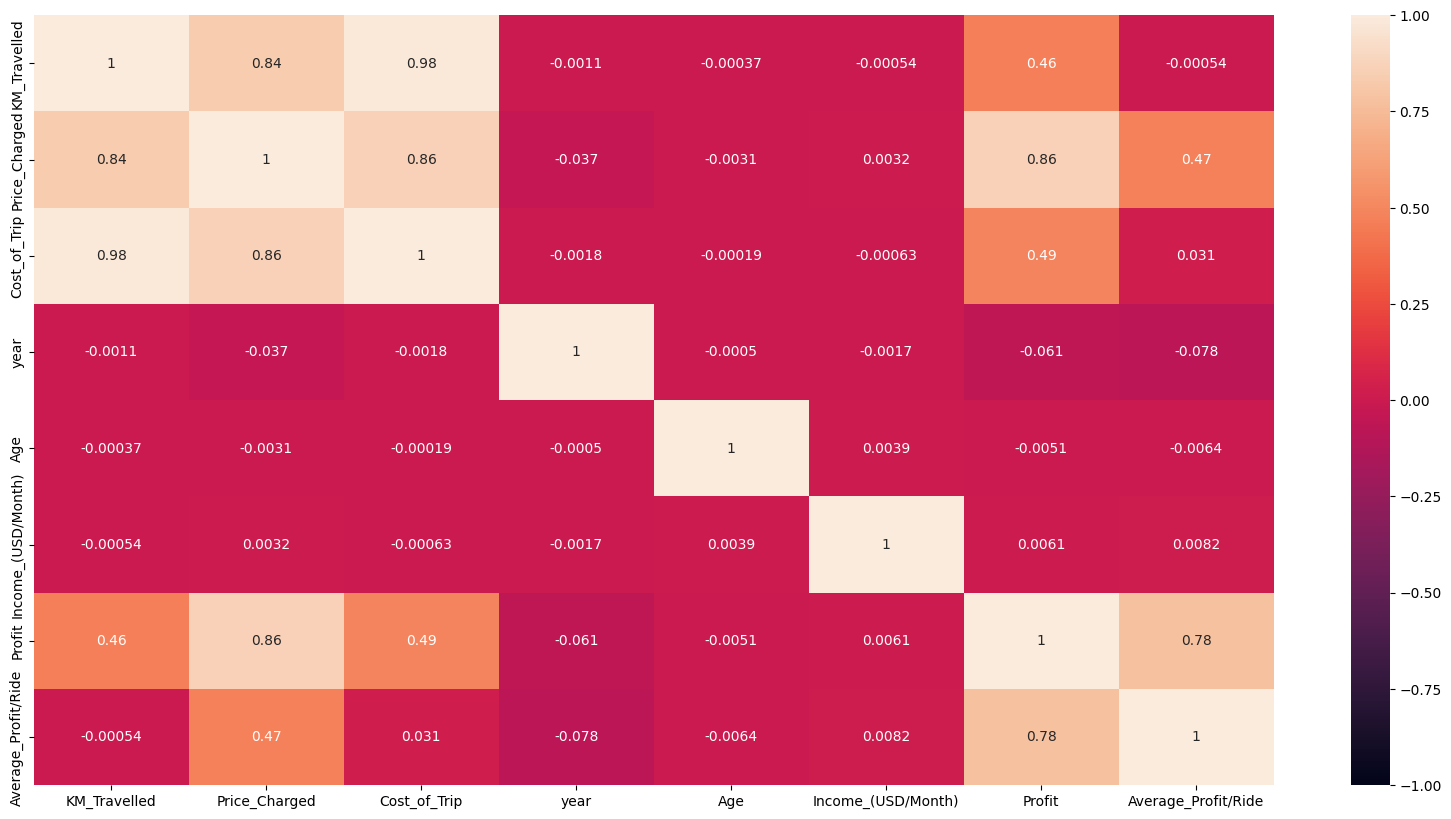

In [266]:
#Heat map of correlation

plt.figure(figsize=(20,10))
sns.heatmap(num_cols.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

There seems to be positive correlation between Profit and Price_Charged

## Hypothesis Testing

In [278]:
# To check if margin stays same between genders.
from scipy.stats import ttest_ind

#samples
Male = MasterData[MasterData['Gender']=='Male']
Female = MasterData[MasterData['Gender']=='Female']
Pink = MasterData[MasterData['Company']=='PinkCab']
Yellow = MasterData[MasterData['Company']=='YellowCab']
Card = MasterData[MasterData['Payment_Mode']=='Card']
Cash = MasterData[MasterData['Payment_Mode']=='Cash']

## One way ANOVA to determine if Profit differs between Genders

In [277]:
from scipy.stats import f_oneway

def oneway(sample1,sample2):
    statistic, pvalue = f_oneway(sample1['Profit'],sample2['Profit'])
    if pvalue < 0.05:
        print('We reject null hypothesis of oneway anova and conclude that there is sufficient evidence to say that the two samples lead to difference in Profit Margin.')
    else:
        print('We fail to reject the null hypothesis of oneway anova and conclude that there is no sufficient evidence to say that the two samples lead to difference in Profit Margin.')
    return print('statistic:',statistic,'P-value:', pvalue)

In [276]:
oneway(Male,Female)

We reject null hypothesis of oneway anova and conclude that there is sufficient evidence to say that the two samples lead to difference in Profit Margin.
statistic: 161.32342659503084 P-value: 5.921884821267643e-37


In [279]:
oneway(Pink,Yellow)

We reject null hypothesis of oneway anova and conclude that there is sufficient evidence to say that the two samples lead to difference in Profit Margin.
statistic: 25719.023655653018 P-value: 0.0


In [280]:
oneway(Card,Cash)

We fail to reject the null hypothesis of oneway anova and conclude that there is no sufficient evidence to say that the two samples lead to difference in Profit Margin.
statistic: 0.5822824407254222 P-value: 0.4454195660309277
